# Introduction
https://apurvibhartia.medium.com/understanding-factors-affecting-wine-quality-4190b8af508e

I will be conduting exploratory data analysis on wine quality data to understand the various factors that determine whether a particular wine is high or low quality. 

Select winequality-red.csv from this link to download dataset:
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/


In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("winequality-red.csv",sep=';')
print(df)
df.head()

Saving winequality-red.csv to winequality-red (1).csv
      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598       

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape # high level understanding

(1599, 12)

In [ ]:
#renaming column names to remove spaces
df = df.rename(columns={"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                   "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                  "free sulfur dioxide": "free_sulfur_dioxide", "total sulfur dioxide": "total_sulfur_dioxide"})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# find out the unique value to make categorical variable
print('Quality')
print(*list(df.quality.unique()))


Quality
5 6 7 4 8 3


In [ ]:
df[df.quality ==8] # to analyse the characteristics for wines with a rank of 8 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8


In [ ]:
# create feature (new column)
df['notfree_sulfur_dioxide']=df.total_sulfur_dioxide-df.free_sulfur_dioxide
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,notfree_sulfur_dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,23.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,42.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,39.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,43.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,23.0


In [ ]:
# Total number of rows and columns
df.shape

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)
# 240 rows and 13 columns are duplicate

number of duplicate rows:  (240, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fixed_acidity           1599 non-null   float64
 1   volatile_acidity        1599 non-null   float64
 2   citric_acid             1599 non-null   float64
 3   residual_sugar          1599 non-null   float64
 4   chlorides               1599 non-null   float64
 5   free_sulfur_dioxide     1599 non-null   float64
 6   total_sulfur_dioxide    1599 non-null   float64
 7   density                 1599 non-null   float64
 8   pH                      1599 non-null   float64
 9   sulphates               1599 non-null   float64
 10  alcohol                 1599 non-null   float64
 11  quality                 1599 non-null   int64  
 12  notfree_sulfur_dioxide  1599 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 162.5 KB


In [ ]:
df.describe().T #only display numeric cloumn also
#df.describe(include='all').T #include non-numeric cloumn also

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
# Analysis on Alcohol attribute 
Q1=df.alcohol.quantile(.25)
Q3=df.alcohol.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",df.alcohol.min())
print("Max Value ",df.alcohol.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)


Min Value 8.4
Max Value  14.9
Q1  9.5
Q3  11.1
IQR  1.5999999999999996
lower_limit 7.1000000000000005
upper_limit 13.5


Text(0.5, 1.0, 'Heatmap: Checking for missing values')

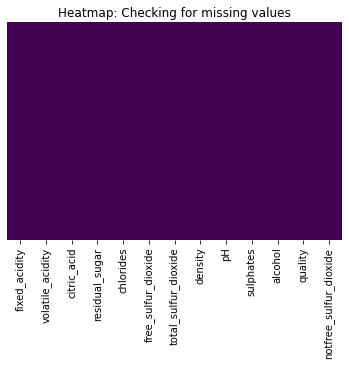

In [ ]:
# to check missing value
sn.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis').set_title('Heatmap: Checking for missing values')

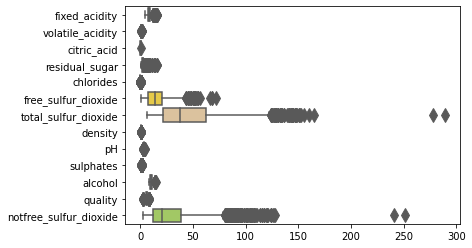

In [ ]:
sn.boxplot(data=df, orient="h", palette="Set2", fliersize=10)

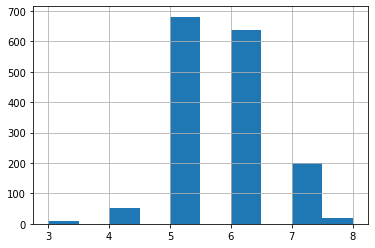

In [ ]:
df.quality.hist()

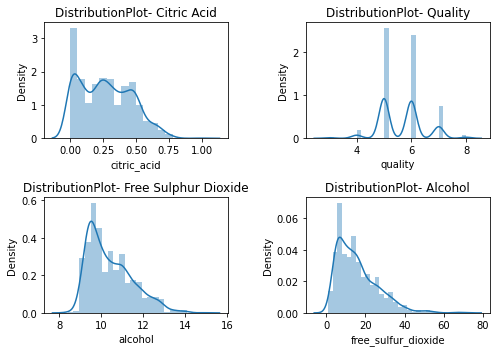

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(7,5))
axes[0,0].set_title('DistributionPlot- Citric Acid')
axes[0,1].set_title('DistributionPlot- Quality')
axes[1,0].set_title('DistributionPlot- Free Sulphur Dioxide')
axes[1,1].set_title('DistributionPlot- Alcohol')

sn.distplot(df.citric_acid, ax=axes[0,0])
sn.distplot(df.quality,ax=axes[0,1]) 
sn.distplot(df.alcohol, ax=axes[1,0])
sn.distplot(df.free_sulfur_dioxide,ax=axes[1,1]) 

fig.tight_layout();  

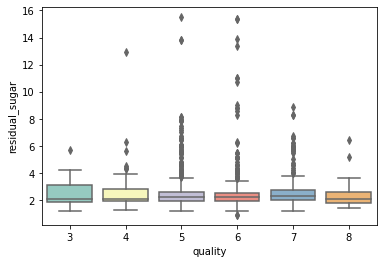

In [ ]:
sn.boxplot(x=df.quality, y=df.residual_sugar, data=df, palette="Set3")

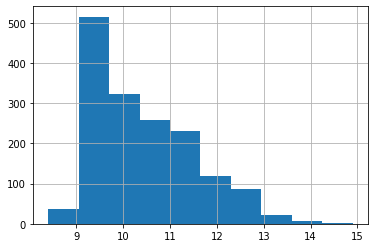

In [ ]:
df.alcohol.hist()

## Categorical Variable Analysis

In [ ]:
#Creating a new categorical variable called quality type 
df['quality_type'] = np.where((df.quality == 6) | (df.quality == 7) | (df.quality == 8), 1, 0)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,notfree_sulfur_dioxide,quality_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,23.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,42.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,39.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,43.0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,23.0,0


In [ ]:
df.quality_type.value_counts()

1    855
0    744
Name: quality_type, dtype: int64

In [ ]:
# in percentage
df.quality_type.value_counts(normalize=True)
# that means 53.47% of wines are high quality and 46.52% are low quality

1    0.534709
0    0.465291
Name: quality_type, dtype: float64

Text(0.5, 0.98, 'Factor plot of Quality Type [0 = low quality & 1 = high quality]')

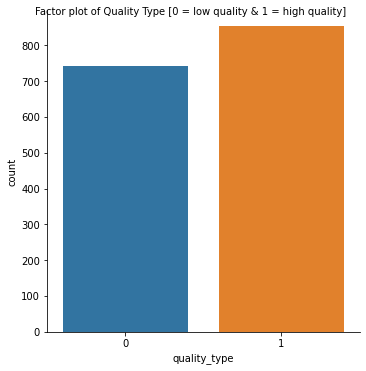

In [ ]:
figure = sn.factorplot(df.quality_type,data=df,kind='count')
figure.fig.suptitle('Factor plot of Quality Type [0 = low quality & 1 = high quality]', fontsize= 10)

### Bivariate Analysis

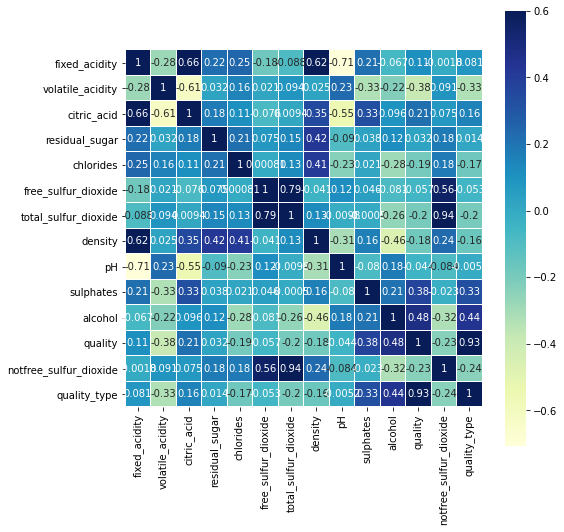

In [ ]:
correl=df.corr(method='spearman')
plt.figure(figsize=(8,8))
fig = sn.heatmap(correl,vmax=.6,linewidths=0.03,square=True,annot=True,cmap='YlGnBu',linecolor='white')
# one variable influenced by other variable

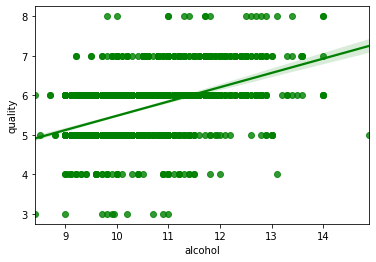

In [ ]:
# plots between independent variables and quality that is target
sn.regplot(x=df.alcohol, y=df.quality, color='g')

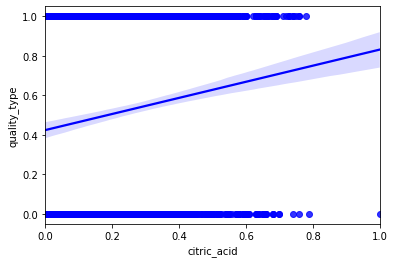

In [ ]:
sn.regplot(x=df.citric_acid, y=df.quality_type, color='b')

SpearmanrResult(correlation=0.47853168747024344, pvalue=2.7268377398474203e-92)


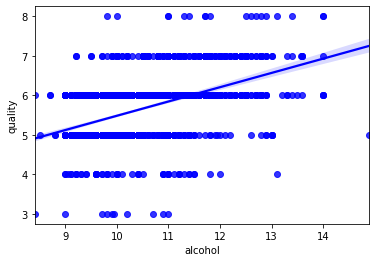

In [ ]:
sn.regplot(x=df.alcohol, y=df.quality, color='b')
print(spearmanr(df.alcohol,df.quality))

SpearmanrResult(correlation=0.2134809144221363, pvalue=6.158952285215761e-18)


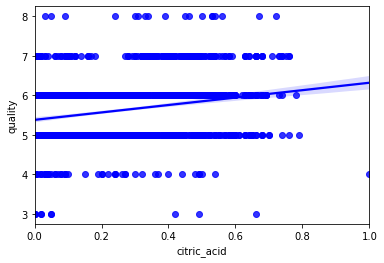

In [ ]:

sn.regplot(x=df.citric_acid, y=df.quality, color='b')
print(spearmanr(df.citric_acid,df.quality))  # find the co-relation between citric acid and quality
# p-value means 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fixed_acidity           1599 non-null   float64
 1   volatile_acidity        1599 non-null   float64
 2   citric_acid             1599 non-null   float64
 3   residual_sugar          1599 non-null   float64
 4   chlorides               1599 non-null   float64
 5   free_sulfur_dioxide     1599 non-null   float64
 6   total_sulfur_dioxide    1599 non-null   float64
 7   density                 1599 non-null   float64
 8   pH                      1599 non-null   float64
 9   sulphates               1599 non-null   float64
 10  alcohol                 1599 non-null   float64
 11  quality                 1599 non-null   int64  
 12  notfree_sulfur_dioxide  1599 non-null   float64
 13  quality_type            1599 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 1

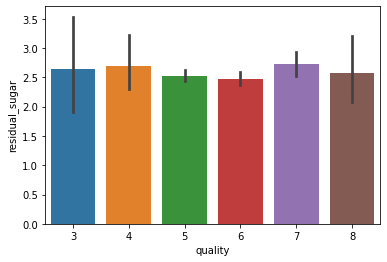

In [ ]:
#bivariate analysis for independent variable being a category and dependent variable being a number
sn.barplot(x=df.quality,y=df.residual_sugar)
# mean value for each quality

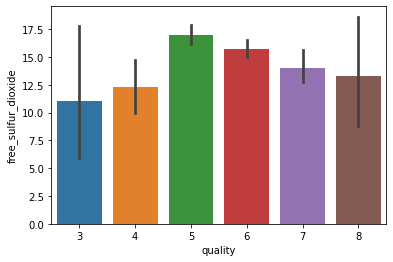

In [ ]:
sn.barplot(x=df.quality, y=df.free_sulfur_dioxide)
# mean value for each condition value

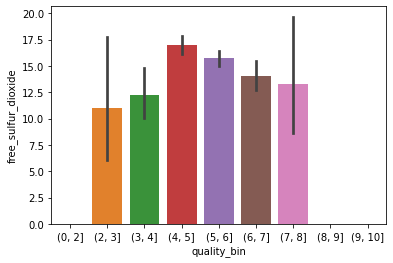

In [ ]:
df['quality_bin']=pd.cut(df.quality,bins=[0,2,3,4,5,6,7,8,9,10])
sn.barplot(x=df.quality_bin,y=df.free_sulfur_dioxide )

## **HYPOTHESIS TESTING**


# Hypothesis 1: I hypothesize that wines with low residual sugar levels and high alcohol levels are high quality.

In [ ]:
fig = px.scatter(df, x=df.residual_sugar, y=df.alcohol, color="quality_type", size = df.free_sulfur_dioxide, title='Scatter plot: alcohol Vs. residual sugar')
fig.show()

The yellow bubbles (high quality wines) are concentrated in low residual sugar levels and high alcohol content levels. We can explore this further by conducting regression analysis. 

# Hypothesis 2: I hypothesize that less residual sugar increases the quality of wine.

Text(0.5, 1.0, 'Residual Sugar Vs. Quality ')

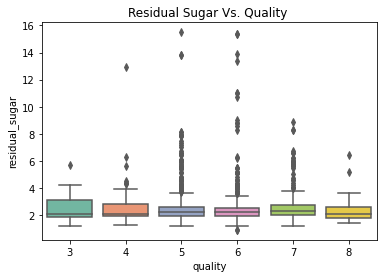

In [ ]:
sn.boxplot(x=df.quality, y=df.residual_sugar, 
                 data=df, palette="Set2").set_title("Residual Sugar Vs. Quality ")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   fixed_acidity           1599 non-null   float64 
 1   volatile_acidity        1599 non-null   float64 
 2   citric_acid             1599 non-null   float64 
 3   residual_sugar          1599 non-null   float64 
 4   chlorides               1599 non-null   float64 
 5   free_sulfur_dioxide     1599 non-null   float64 
 6   total_sulfur_dioxide    1599 non-null   float64 
 7   density                 1599 non-null   float64 
 8   pH                      1599 non-null   float64 
 9   sulphates               1599 non-null   float64 
 10  alcohol                 1599 non-null   float64 
 11  quality                 1599 non-null   int64   
 12  notfree_sulfur_dioxide  1599 non-null   float64 
 13  quality_type            1599 non-null   int64   
 14  quality_bin             

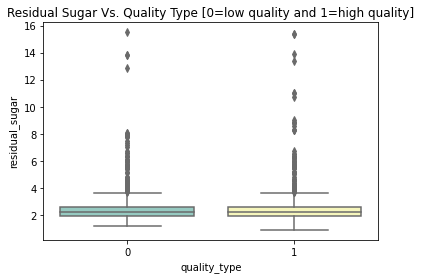

In [ ]:
sn.boxplot(x=df.quality_type, y=df.residual_sugar, 
                 data=df, palette="Set3").set_title("Residual Sugar Vs. Quality Type [0=low quality and 1=high quality]")

df.info()                

The median values of residual sugar for high and low quality types are similar which gives us an indication that quality type is not affected by residual sugar. 

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

# I am using Multiple Linear Regression to understand the effects of residual sugar on quality to avoid omitted variable biases

X = df[['alcohol','citric_acid','residual_sugar', 'fixed_acidity', 'volatile_acidity', 'total_sulfur_dioxide', 'chlorides','density']] 
Y = df['quality']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



Intercept: 
 15.688133213682658
Coefficients: 
 [ 2.98938469e-01 -1.83591366e-01  9.27892760e-03  5.26722463e-02
 -1.35016090e+00 -1.64535636e-03 -2.85760859e-01 -1.28075377e+01]


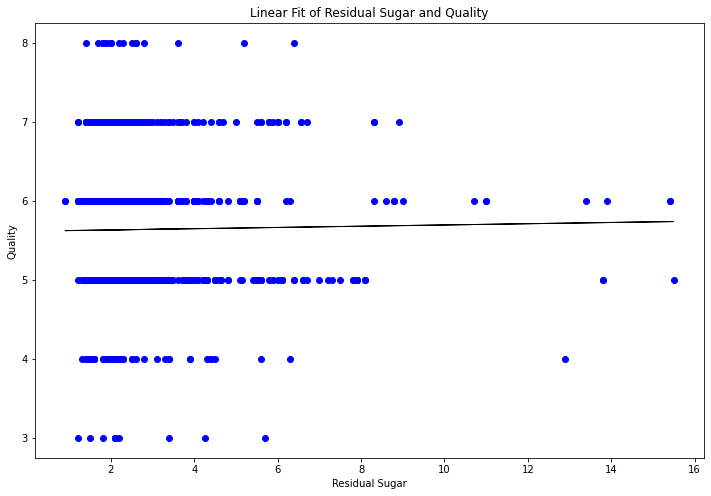

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3012
Date:                Mon, 08 Mar 2021   Prob (F-statistic):              0.583
Time:                        06:50:51   Log-Likelihood:                -1926.5
No. Observations:                1599   AIC:                             3857.
Df Residuals:                    1597   BIC:                             3868.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.6161      0.042    134.

In [ ]:
from sklearn.linear_model import LinearRegression

X = df.residual_sugar.values.reshape(-1,1)
Y = df.quality.values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,Y)
predict_quality = reg.predict(X)

plt.figure(figsize=(12, 8))
plt.scatter( df.residual_sugar, df.quality, c='blue')

plt.plot(df.residual_sugar, predict_quality, c='black', linewidth=1)

plt.title("Linear Fit of Residual Sugar and Quality")
plt.xlabel("Residual Sugar")
plt.ylabel("Quality")
plt.show()

X = df.residual_sugar
Y = df.quality
Z = sm.add_constant(X)
est = sm.OLS(Y, Z)
est2 = est.fit()
print(est2.summary())


The p value for the variable residual sugar is greater than 0.05 which means that residual sugar is not statistically significant at the 5% level. So, I would conclude that residual sugar does not impact the quality of wine. 

# Hypothesis 3: I hypothesize that alcohol affects the quality of wine 

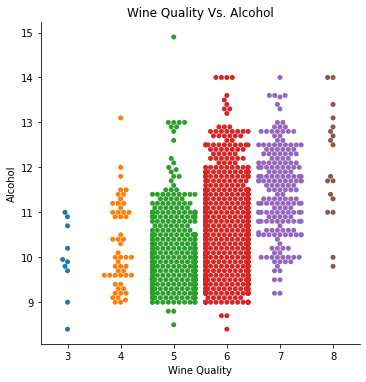

In [ ]:
sn.catplot(x = df.quality, y = df.alcohol, kind = "swarm", data = df)
plt.title ('Wine Quality Vs. Alcohol')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol')
plt.show()

Wine Quality seems to be better for a higher alcohol content but the relationship does not seem strong 

Text(0.5, 1.0, 'Boxplot: Quality Vs. Alcohol')

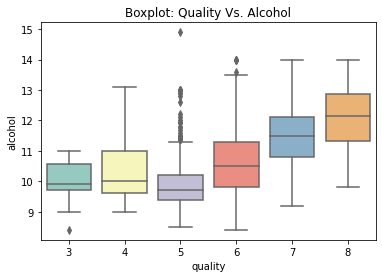

In [ ]:
sn.boxplot(x=df.quality, y=df.alcohol, data=df, palette="Set3").set_title("Boxplot: Quality Vs. Alcohol")

Text(0.5, 1.0, 'Boxplot: Quality Type [0=low quality and 1=high quality] Vs. Alcohol')

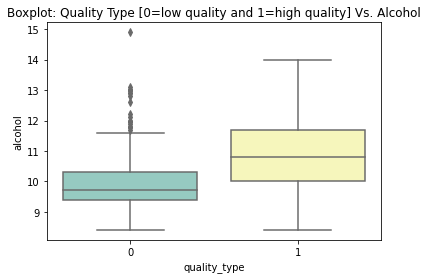

In [ ]:
sn.boxplot(x=df.quality_type, y=df.alcohol, data=df, palette="Set3").set_title("Boxplot: Quality Type [0=low quality and 1=high quality] Vs. Alcohol")

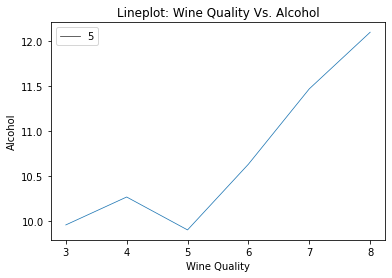

In [ ]:
sns.lineplot(x = df.quality, y = df.alcohol, ci=None, data = df ,size=5)
plt.title ('Lineplot: Wine Quality Vs. Alcohol')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol')
plt.show()

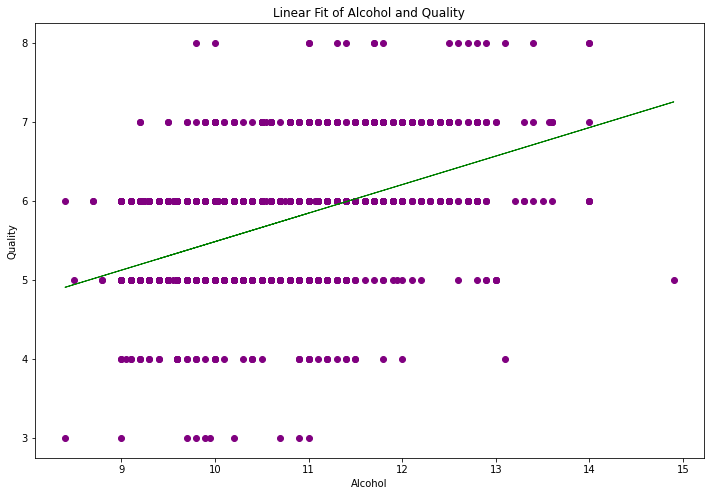

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           2.83e-91
Time:                        06:53:36   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.0

In [ ]:
X = df.alcohol.values.reshape(-1,1)
Y = df.quality.values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,Y)
predict_quality = reg.predict(X)

plt.figure(figsize=(12, 8))
plt.scatter( df.alcohol, df.quality, c='purple')

plt.plot(df.alcohol, predict_quality, c='green', linewidth=1)

plt.title("Linear Fit of Alcohol and Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.show()

X = df.alcohol
Y = df.quality
Z = sm.add_constant(X)
est = sm.OLS(Y, Z)
est2 = est.fit()
print(est2.summary())

The p-value for the variable is less than 0.01 which means that alcohol is statistically significant at the 1% level. So, I would conclude that alcohol does impact the quality of the wine. 